In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
X = df.drop('Class', axis=1)

In [9]:
X.shape

(178, 13)

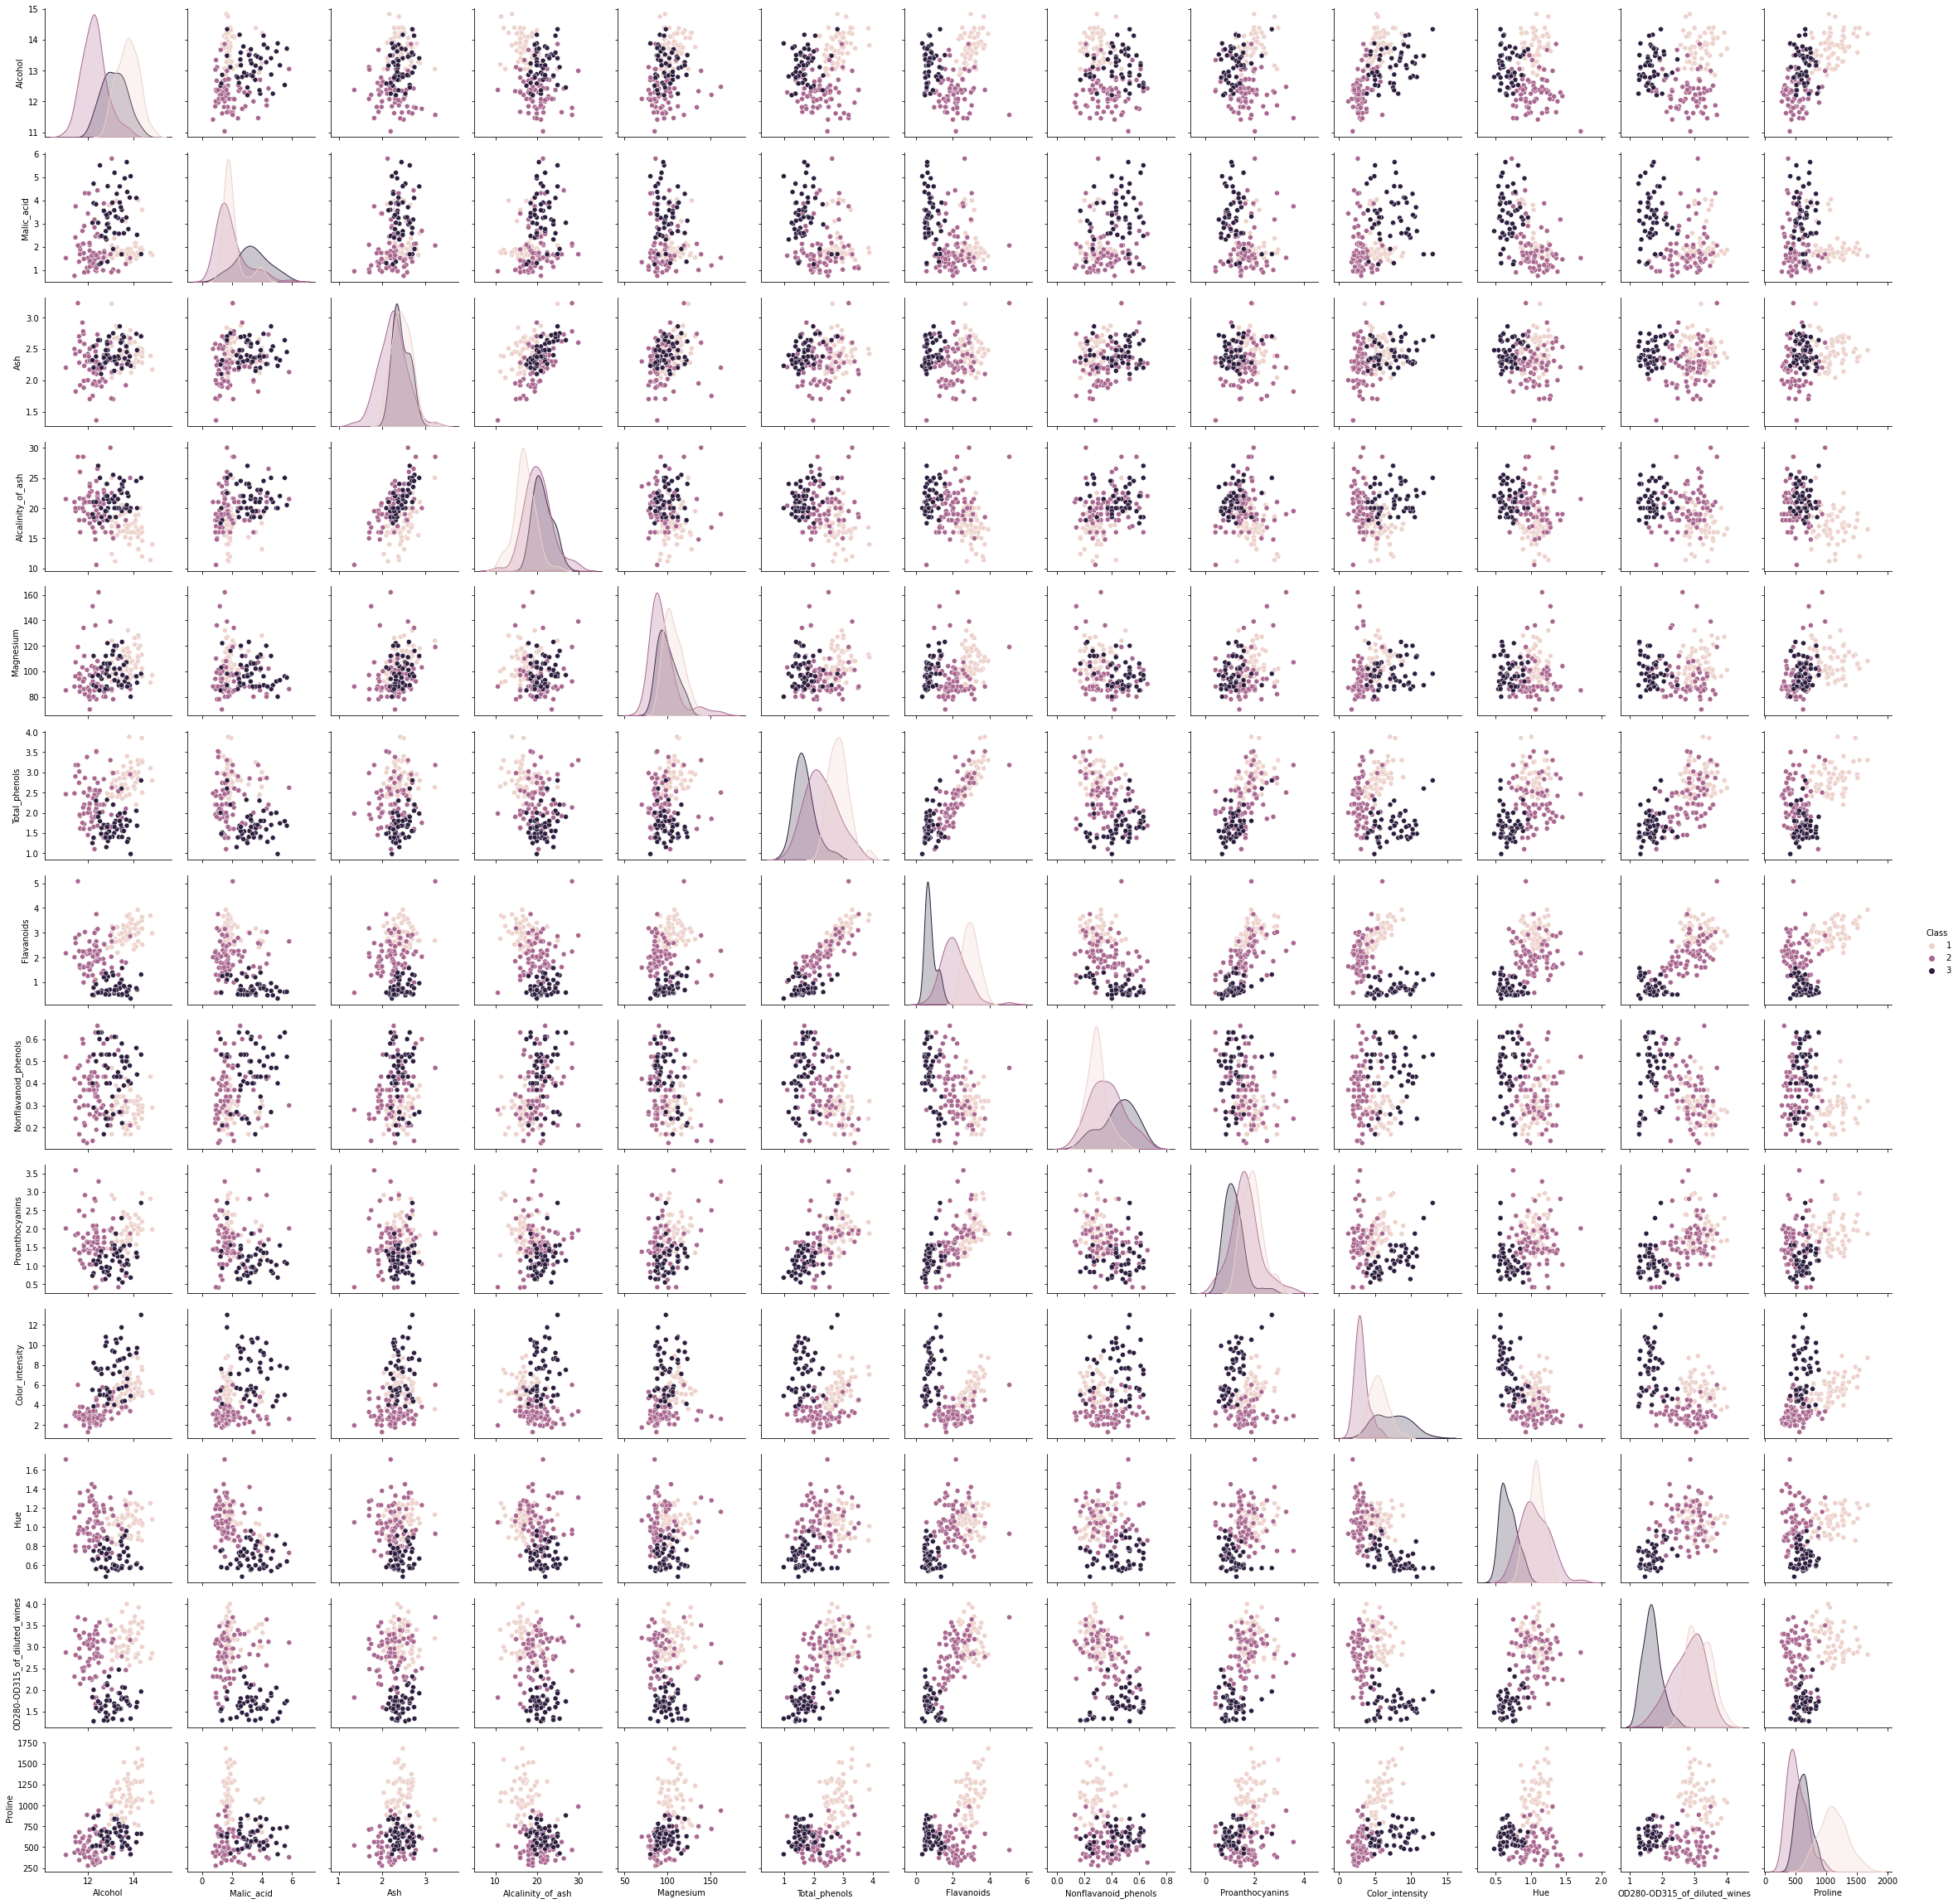

In [11]:
import seaborn as sns
sns.pairplot(df, hue='Class')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
Xsc = sc.fit_transform(X)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

#Model 1

In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 3s 19ms/step - loss: 0.4473 - accuracy: 0.8380 - val_loss: 0.8641 - val_accuracy: 0.8889
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9507 - val_loss: 0.4594 - val_accuracy: 0.8611
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0892 - accuracy: 0.9577 - val_loss: 0.0567 - val_accuracy: 0.9722
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.0415 - accuracy: 0.9789 - val_loss: 0.0698 - val_accuracy: 0.9444
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0861 - accuracy: 0.9789 - val_loss: 0.1506 - val_accuracy: 0.9444
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 8.9147e-04 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0201 - accuracy: 0.9859 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 8/10
18/1

#Model 2

In [18]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 5ms/step - loss: 0.6250 - accuracy: 0.7697
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.9607
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0974 - accuracy: 0.9888
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9944
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9607
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9831
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [20]:
inp = model.layers[0].input
out = model.layers[2].output

In [21]:
features_function = K.function([inp], [out])

In [22]:
features = features_function([Xsc])[0]

In [23]:
features.shape

(178, 2)

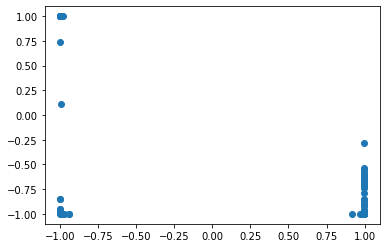

In [24]:
plt.scatter(features[:, 0], features[:, 1])

#Model 3

In [25]:
from keras.layers import Input
from keras.models import Model

In [26]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 6ms/step - loss: 0.6248 - accuracy: 0.7472
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.9719
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9775
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.1012 - accuracy: 0.9831
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9944
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9831
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.9831
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9944
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0934 - accuracy: 0.9775
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [27]:
features_function = K.function([inputs], [second_to_last])

In [28]:
features = features_function([Xsc])[0]

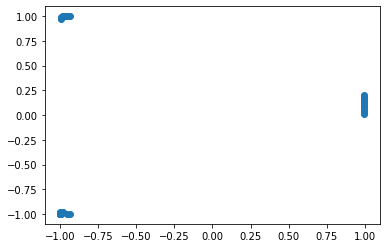

In [29]:
plt.scatter(features[:, 0], features[:, 1])

#EarlyStopping

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [31]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5",
                               verbose=1, save_best_only=True)

In [32]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [33]:
tensorboard = TensorBoard(log_dir='')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [36]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.58955, saving model to weights.hdf5
4/4 - 1s - loss: 0.8690 - accuracy: 0.6048 - val_loss: 0.5895 - val_accuracy: 0.8519 - 1s/epoch - 271ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 0.58955 to 0.41756, saving model to weights.hdf5
4/4 - 0s - loss: 0.5512 - accuracy: 0.8548 - val_loss: 0.4176 - val_accuracy: 0.9074 - 87ms/epoch - 22ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 0.41756 to 0.32025, saving model to weights.hdf5
4/4 - 0s - loss: 0.3120 - accuracy: 0.9597 - val_loss: 0.3202 - val_accuracy: 0.9074 - 85ms/epoch - 21ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 0.32025 to 0.24174, saving model to weights.hdf5
4/4 - 0s - loss: 0.2179 - accuracy: 0.9677 - val_loss: 0.2417 - val_accuracy: 0.9444 - 84ms/epoch - 21ms/step
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.24174
4/4 - 0s - loss: 0.1373 - accuracy: 0.9919 - val_loss: 0.2653 - val_accuracy: 0.9259 - 152ms/epoch - 38ms/step
Epo